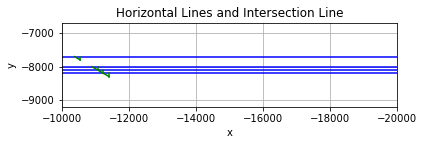

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Константы
start_x = -10000
end_x = -20000
levels = [-7700, -8000, -8100, -8200]
vert_len = 100
fault_A = 0.577
fault_B = 1
fault_C = -1617  # Значение изменено на отрицательное

# Функция для нахождения точек пересечения
def line_intersection(a1, b1, c1, a2, b2, c2):
    x = (b1*c2 - b2*c1) / (a1*b2 - a2*b1)
    y = (a1*c2 - a2*c1) / (a1*b2 - a2*b1)
    return x, y

# Рисование горизонтальных линий
for level in levels:
    plt.hlines(y=level, xmin=start_x, xmax=end_x, color='blue')

# Рисование линии разлома
x = np.linspace(start_x, end_x, 400)
y = (-fault_A * x + fault_C) / fault_B
plt.plot(x, y, color='red')

# Расчет и рисование треугольников
for level in levels:
    intersec_x, intersec_y = line_intersection(fault_A, fault_B, fault_C, 0, 1, level)
    dx = vert_len / np.tan(np.arctan(fault_A/fault_B))
    plt.plot([intersec_x, intersec_x], [intersec_y, intersec_y - vert_len], color='green')
    plt.plot([intersec_x, intersec_x + dx], [intersec_y - vert_len, intersec_y], color='green')

plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(start_x, end_x)  # Set the x-axis limits
plt.ylim(min(levels)-1000, max(levels)+1000)  # Set the y-axis limits
plt.xlabel('x')
plt.ylabel('y')
plt.title('Horizontal Lines and Intersection Line')
plt.grid(True)
plt.show()
